In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Folders

In [2]:
results_folder = 'Q:\\Personal\\Irina\\projects\\isttc\\results\\monkey\\fixation_period_1500ms\\'

### Load data

In [5]:
#sttc_df = pd.read_pickle(results_folder + 'not_binned_sttc\\' + 'tau_bsl_sua_sttc_50ms_20lags_df.pkl')
pearson_df = pd.read_pickle(results_folder + 'binned_pearson\\' + 'tau_bsl_sua_pearson_50ms_20lags_df.pkl')

#print('let sttc_df {}, len pearson_df {}'.format(len(sttc_df), len(pearson_df)))
print('len pearson_df {}'.format(len(pearson_df)))

len pearson_df 33018


In [ ]:
sttc_df.head()

In [4]:
pearson_df.head()

,unit_id,trial_id,condition_id,acf,acf_decay_1_4,popt,pcov,r_squared,tau,tau_ms,...,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20,popt_0,popt_1,popt_2,acf_fit_failed
0,0,0,0,"[1.0, -0.016595339990489767, -0.11022349025202...",False,"[840.092672156566, 11.014596408154562, -0.0304...","[[1.077075998679899e+17, 132991388600829.8, 16...",0.001230,0.090789,4.539431,...,-0.034950,-0.128578,-0.185117,0.057917,-0.041417,0.073229,840.092672,11.014596,-0.030435,False
1,0,1,0,"[1.0, 0.021739130434782598, 0.0434782608695652...",False,"[0.3507418102741434, 2.0366202765825974, -0.02...","[[60.84484223758324, 169.16441198875847, 0.055...",0.006963,0.491010,24.550477,...,-0.065217,-0.130435,-0.065217,-0.086957,0.065217,0.086957,0.350742,2.036620,-0.020023,False
2,0,2,0,"[1.0, 0.22380952380952382, 0.18571428571428578...",True,"[0.9595269448378968, 1.1224890691754204, -0.05...","[[2.032239769855773, 1.7646794612303478, 0.011...",0.208556,0.890877,44.543864,...,-0.154762,-0.145238,-0.064286,-0.019048,-0.021429,-0.095238,0.959527,1.122489,-0.058863,False
3,0,3,0,"[1.0, -0.02756800649614294, -0.057572066585464...",True,NaN,NaN,NaN,NaN,NaN,...,-0.029842,-0.132927,0.230491,-0.010231,0.207024,-0.106780,NaN,NaN,NaN,True
4,0,4,0,"[1.0, 0.14583333333333331, 0.32291666666666663...",False,"[0.557578139005768, 0.5406520403117887, -0.068...","[[0.16908215115723665, 0.16222970127163708, 0....",0.264596,1.849618,92.480924,...,0.125000,-0.072917,0.166667,-0.093750,0.020833,-0.020833,0.557578,0.540652,-0.068563,False


In [6]:
#sttc_df_subset = sttc_df[['unit_id', 'animal_id', 'session_id', 'area_id','acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()
pearson_df_subset = pearson_df[['unit_id', 'trial_id', 'acf_decay_1_4', 'r_squared', 'tau', 'tau_ms', 'acf_fit_failed']].copy()

In [ ]:
df_merged = pd.merge(sttc_df_subset, pearson_df_subset, on='unit_id', how='inner', suffixes=('_sttc', '_pear'))
df_merged

In [ ]:
df_merged['diff'] = df_merged['r_squared_sttc'] - df_merged['r_squared_pear']

### Plots

#### ACF

In [81]:
pearson_acf_df_0_1000 = pearson_df.query('tau_ms > 0 and tau_ms <= 1000 and r_squared >= 0.5').copy()
pearson_acf_df_0_1000.head(3)

,unit_id,trial_id,condition_id,acf,acf_decay_1_4,popt,pcov,r_squared,tau,tau_ms,...,acf_15,acf_16,acf_17,acf_18,acf_19,acf_20,popt_0,popt_1,popt_2,acf_fit_failed
5,0,5,0,"[1.0, 0.34018691588785044, 0.577570093457944, ...",False,"[0.9135419258818126, 0.11263344143581525, -0.3...","[[0.008465372402469484, -0.0016444788033501009...",0.880069,8.878358,443.917893,...,-0.177570,-0.183178,-0.254206,-0.278505,-0.256075,-0.182243,0.913542,0.112633,-0.347293,False
8,0,8,1,"[1.0, 0.44755927475592744, 0.14616457461645752...",True,"[0.9948682682941566, 0.6343511421816619, -0.08...","[[0.1262456206924116, 0.07610525980405722, 0.0...",0.646978,1.576414,78.820698,...,-0.002092,0.004045,-0.044212,-0.086192,-0.048675,-0.168061,0.994868,0.634351,-0.086805,False
14,0,14,1,"[1.0, 0.36306695464362854, 0.2099352051835853,...",True,"[1.0711987289312852, 0.9525052727417687, -0.03...","[[0.3493737604036596, 0.2512206855263627, 0.00...",0.581194,1.049863,52.493148,...,0.078834,0.098488,-0.039525,0.051404,-0.030454,-0.133909,1.071199,0.952505,-0.030291,False


In [91]:
acf_columns_labels = ['acf_' + str(i) for i in range(21)]
print(acf_columns_labels)

acf_pearson_df = pearson_df[['unit_id', 'trial_id', 'tau_ms', 'acf_decay_1_4', 'r_squared'] + acf_columns_labels].copy()
acf_pearson_df_0_1000 = acf_pearson_df.query('tau_ms > 0 and tau_ms <= 1000 and r_squared >= 0.8').copy()
print(len(acf_pearson_df_0_1000))

acf_pearson_df_mean = acf_pearson_df.groupby(by='unit_id', as_index=False)[acf_columns_labels].mean()
acf_pearson_df_mean

acf_pearson_mean = acf_pearson_df_mean[acf_columns_labels].values
acf_pearson_mean.shape

['acf_0', 'acf_1', 'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9', 'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16', 'acf_17', 'acf_18', 'acf_19', 'acf_20']
2337


(543, 21)

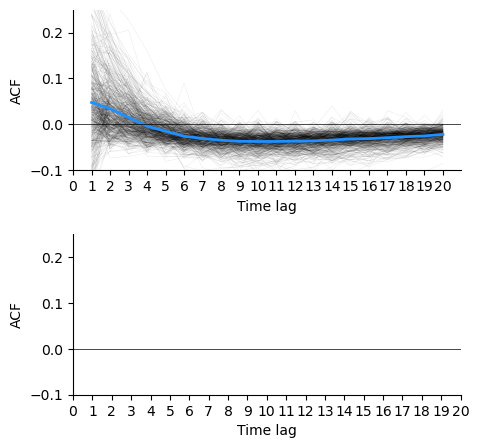

In [93]:
fig, axes = plt.subplots(2,1, figsize=(5,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

t_axis = np.linspace(0, 20, acf_pearson.shape[1])

avg_acf_pearson = np.mean(acf_pearson_mean, axis=0)
#avg_acf_isttc = np.mean(acf_isttc, axis=0)

for ii in range(acf_pearson_mean.shape[0]):
    axes[0].plot(t_axis[1:], acf_pearson_mean[ii][1:], c='k', lw=0.3, alpha=0.1)
axes[0].plot(t_axis[1:], avg_acf_pearson[1:], c='dodgerblue', lw=2, alpha=1)


# for ii in range(acf_isttc.shape[0]):
#     axes[1].plot(t_axis, acf_isttc[ii], c='k', lw=0.3, alpha=0.1)
# axes[1].plot(t_axis, avg_acf_isttc, c='dodgerblue', lw=2, alpha=1)


for ax in axes.flat:
    ax.axhline(y=0, lw=0.5, c='k')
    ax.set_xlabel('Time lag')
    ax.set_ylabel('ACF')
    ax.set_xticks(t_axis)
    ax.set_ylim([-0.1, 0.25])

sns.despine()

#### Taus

In [54]:
pearson_df_0_1000 = pearson_df_subset.query('tau_ms > 0 and tau_ms <= 1000 and acf_decay_1_4 == True').copy()
print(len(pearson_df_0_1000))

pearson_df_0_1000['tau_ms_log10'] = np.log10(pearson_df_0_1000['tau_ms'])

11142


In [55]:
count_df = pearson_df_0_1000.groupby(by='unit_id', as_index=False)['trial_id'].count().sort_values(by='trial_id')
count_df.rename(columns={'trial_id':'n_trials'}, inplace=True)
count_df

,unit_id,n_trials
230,230,1
385,388,1
315,317,1
412,415,1
540,543,2
...,...,...
510,513,59
311,313,61
129,129,62
17,17,64


In [56]:
# by unit (average over trial)
pearson_df_0_1000_median = pearson_df_0_1000.groupby(by='unit_id', as_index=False)['tau_ms'].median().sort_values(by='tau_ms')
pearson_df_0_1000_median = pearson_df_0_1000_median.merge(count_df, on='unit_id', how='left')
pearson_df_0_1000_median.query('n_trials >= 20')

,unit_id,tau_ms,n_trials
9,117,9.613764,28
10,489,11.384197,29
11,470,12.132653,22
13,187,15.765617,20
17,485,21.306727,56
...,...,...,...
518,387,161.881948,24
521,110,163.260518,28
524,175,184.112239,27
533,297,224.070899,23


In [57]:
# by unit (average over trial)
pearson_df_0_1000_mean = pearson_df_0_1000.groupby(by='unit_id', as_index=False)['tau_ms'].mean().sort_values(by='tau_ms')
pearson_df_0_1000_mean = pearson_df_0_1000_mean.merge(count_df, on='unit_id', how='left')
pearson_df_0_1000_mean.query('n_trials >= 20')

,unit_id,tau_ms,n_trials
3,117,33.854526,28
5,304,37.829478,24
6,486,38.216937,29
12,485,43.358982,56
15,386,45.900022,24
...,...,...,...
503,424,207.275879,21
518,175,224.942288,27
521,75,231.960935,52
522,348,232.430975,23


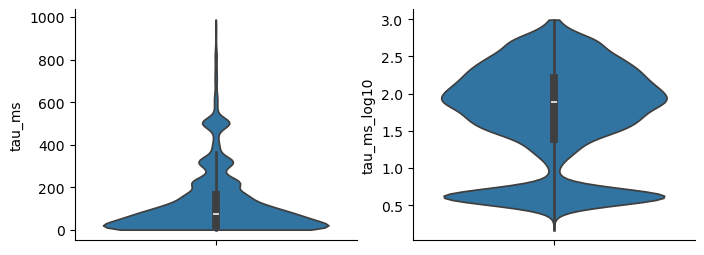

In [58]:
# plot without grouping 

fig, axes = plt.subplots(1, 2, figsize=(8,3))

sns.violinplot(ax=axes[0], y='tau_ms', data=pearson_df_0_1000, cut=0, density_norm='width')
sns.violinplot(ax=axes[1], y='tau_ms_log10', data=pearson_df_0_1000, cut=0, density_norm='width')

# axes[0].set_title('% trials with fr >= 1hz: {}'.format(perc_trials_above1hz))
# axes[1].set_title('Mean fr {}, mead fr {}'.format(mean_fr, med_fr))

# axes[0].axhline(y=1, lw=1, color='red')
# axes[1].axhline(y=1, lw=1, color='red')

sns.despine()

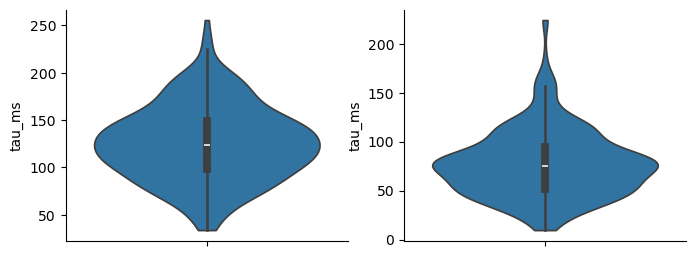

In [59]:
# plot with grouping by unit, meadian and mean

fig, axes = plt.subplots(1, 2, figsize=(8,3))

sns.violinplot(ax=axes[0], y='tau_ms', data=pearson_df_0_1000_mean.query('n_trials >= 20'), cut=0, density_norm='width')
sns.violinplot(ax=axes[1], y='tau_ms', data=pearson_df_0_1000_median.query('n_trials >= 20'), cut=0, density_norm='width')

# axes[0].set_title('% trials with fr >= 1hz: {}'.format(perc_trials_above1hz))
# axes[1].set_title('Mean fr {}, mead fr {}'.format(mean_fr, med_fr))

# axes[0].axhline(y=1, lw=1, color='red')
# axes[1].axhline(y=1, lw=1, color='red')

sns.despine()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# sns.stripplot(ax=axes[0], x = 'area_id', y='tau_ms', 
#                order=sttc_df_hp_0_1000_median['area_id'].values,
#                data=sttc_df_hp_0_1000_animal_med, color='white', s=3)
sns.violinplot(ax=axes[0], x = 'area_id', y='tau_ms', 
               order=sttc_df_hp_0_1000_median['area_id'].values,
               data=sttc_df_hp_0_1000_animal_med, cut=0,  scale='width')
axes[0].set_title('med animal sttc in HP, 50ms, 20lags, \n allen, n_animals = ' + str(n_animals))

sns.violinplot(ax=axes[1], x = 'area_id', y='tau_ms', 
               order=sttc_df_hp_0_1000_mean['area_id'].values,
               data=sttc_df_hp_0_1000_animal_mean, cut=0,  scale='width')
# sns.stripplot(ax=axes[1], x = 'area_id', y='tau_ms', 
#                order=sttc_df_hp_0_1000_mean['area_id'].values,
#                data=sttc_df_hp_0_1000_animal_mean, color='white', s=3)
axes[1].set_title('mean animal sttc in HP, 50ms, 20lags, \n allen, n_animals = ' + str(n_animals))

sns.despine()

fig.savefig(isttc_results_folder_path + 'taus_in_hp_mouse_level.png' , bbox_inches='tight')

In [ ]:
# fig, axes = plt.subplots(1,1, figsize=(5,3))

# sns.stripplot(ax=axes, x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values, 
#               data=sttc_df_hp_0_1000_median,
#               color='black', label='median', legend=False)
# sns.stripplot(ax=axes, x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values,
#               data=sttc_df_hp_0_1000_mean,
#               color='steelblue', label='mean', legend=False)
# axes.axhline(y=100, lw=0.5, c='k')
# axes.axhline(y=50, lw=0.5, c='k')
# # axes[0,0].axhline(y=200, lw=0.5, c='k')
# # axes[0,0].axhline(y=250, lw=0.5, c='k')
# axes.set_title('sttc in HP, 50ms, 10lags, allen')
# axes.set_ylim([0,200])

# sns.despine()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x = 'area_id', y='tau_ms_log10', order=sttc_df_hp_0_1000_median['area_id'].values,
               data=sttc_df_hp_0_1000, cut=0,  scale='width')
axes[0].set_title('units sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))

sns.stripplot(ax=axes[1], x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values, 
              data=sttc_df_hp_0_1000_median,
              color='black', label='median', legend=False)

sns.stripplot(ax=axes[2], x='area_id', y='tau_ms', order=sttc_df_hp_0_1000_median['area_id'].values,
              data=sttc_df_hp_0_1000_mean,
              color='steelblue', label='mean', legend=False)
axes[2].axhline(y=100, lw=0.5, c='k')
axes[2].axhline(y=150, lw=0.5, c='k')
axes[2].set_title('mean sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))
axes[2].set_ylim([50,200])

#axes[0].axhline(y=68, lw=0.5, c='k')
axes[1].axhline(y=100, lw=0.5, c='k')
axes[1].axhline(y=50, lw=0.5, c='k')
axes[1].set_title('med sttc in HP, 50ms, 20lags, \n allen, ' + str(len(sttc_df_hp_0_1000)))
axes[1].set_ylim([30,150])

sns.despine()

fig.savefig(isttc_results_folder_path + 'taus_in_hp_unit_and_area.png' , bbox_inches='tight')

#### Areas from Rudelt et al (6 visual and 2 thalamic)

In [ ]:
sttc_df_subset['area_id'].unique()

In [ ]:
sttc_df_rudelt = sttc_df_subset.query('area_id == "VISp" or area_id == "VISl" or area_id == "VISal" or area_id == "VISrl" or area_id == "VISam" or area_id == "VISpm"').copy()
print(len(sttc_df_rudelt))

sttc_df_rudelt_0_1000 = sttc_df_rudelt.query('tau_ms > 10 and tau_ms <= 1000 and r_squared >= 0.5').copy()
print(len(sttc_df_rudelt_0_1000))

In [ ]:
# by area
sttc_df_rudelt_median = sttc_df_rudelt_0_1000.groupby(by='area_id', as_index=False)['tau_ms'].median().sort_values(by='tau_ms')
sttc_df_rudelt_median

#### Quality

In [ ]:
n_sttc_better = len(df_merged.query('diff > 0'))
n_sttc_better_perc = n_sttc_better / len(df_merged) * 100

fig, axes = plt.subplots(1,3, figsize=(12,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(ax=axes[0], x=df_merged['r_squared_pear'].values, y=df_merged['r_squared_sttc'].values, bins=200)
axes[0].plot([0, 1], [0, 1], c='k', transform=axes[0].transAxes)
axes[0].set_aspect('equal', adjustable='box')
axes[0].set_xlabel('Pearson R-squared')
axes[0].set_ylabel('STTC R-squared')
axes[0].set_title('binned')

sns.scatterplot(ax=axes[1], x=df_merged['r_squared_pear'].values, y=df_merged['r_squared_sttc'].values, s=2)
axes[1].plot([0, 1], [0, 1], c='k', transform=axes[1].transAxes)
axes[1].set_aspect('equal', adjustable='box')
axes[1].set_xlabel('Pearson R-squared')
axes[1].set_ylabel('STTC R-squared')
axes[1].set_title('scatter')

sns.histplot(ax=axes[2], x=df_merged['diff'].values, stat='probability', bins=100, kde=False, color='steelblue')
axes[2].axvline(x=0, lw=1, c='k')
axes[2].set_xlabel('STTC R-squared - \nPearson R-squared')
axes[2].set_title('{}% STTC fits \nhave higher R-squared'.format(np.round(n_sttc_better_perc,2)))

fig.suptitle('sttc vs pearson, allen, n_units = ' + str(len(df_merged)) 
             + ', sttc: ' + str(n_95_fits_sttc - n_95_fits_pearson) 
             + ' (' + str(np.round(diff_0_8, 2)) +'%)' + ' units more with r_sq >= 0.8', y=1.15)

sns.despine()

fig.savefig(isttc_results_folder_path + 'allen_sttc_vs_pearson.png' , bbox_inches='tight')

In [ ]:
n_95_fits_sttc = len(df_merged.query('r_squared_sttc >= 0.8'))
n_95_fits_pearson = len(df_merged.query('r_squared_pear >= 0.8'))

print('n_95_fits_sttc {}, n_95_fits_pearson {}'.format(n_95_fits_sttc, n_95_fits_pearson))

diff_0_8 = (n_95_fits_sttc - n_95_fits_pearson) / len(df_merged) * 100
print(diff_0_8)